# 7PAVREPR ASMHI Research Project
## Research Project Code
## AF37930

# Task 2
## Understanbd the data

### 2.1 Import Packages need for this task
a number of different packages are used：

Pandas and NumPy were used for efficient data manipulation;

Matplotlib and Seaborn  for creating figures and data visualizations;

Scikit-learn’s packages like TfidfVectorizer, LogisticRegression to support Traditional machine learning methods and evaluation metrics for the performance assessment;

NLTK toolkit for tokenization, stopword removal, and lemmatization

Other Python standard libraries like re and string for text preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.2 Loading the Filtered Dataset (data_SBDH)

##### Have a look of the full discharge summary text part we filtered

In [6]:
data_SBDH = pd.read_csv('mydataset1.csv')
data_SBDH.head()

,row_id,sdoh_community_present,sdoh_community_absent,sdoh_education,sdoh_economics,sdoh_environment,behavior_alcohol,behavior_tobacco,behavior_drug,TEXT,social_history
0,5,0,0,0,0,0,0,1,0,Admission Date: [**2190-5-16**] Discharge...,She smokes a pack per day.
1,42,0,0,0,0,0,0,2,0,Admission Date: [**2174-8-6**] D...,Social history is significant for the absence ...
2,136,1,0,0,2,1,3,4,0,Admission Date: [**2139-2-4**] D...,"Retired schoolteacher, now substitutes. Lives ..."
3,442,1,1,0,0,1,3,1,2,Admission Date: [**2193-1-8**] D...,- Tobacco: smokes 1-1.5ppd x 30yrs\n- Alcohol:...
4,328,1,0,0,2,1,3,3,3,Admission Date: [**2198-4-22**] ...,"Married with three children, born in [**2184**..."


In [7]:
# Get the number of rows (records) in the MIMIC-SBDH dataset we use
len(data_SBDH)

7025

The result shows that there are 7,025 records of the "social history" section in the MIMIC-SBDH dataset we selected.

### 2.3 Descriptive Statistics 1
### Distribution of Number of SDMHs Categories Mentioned per discharge summary

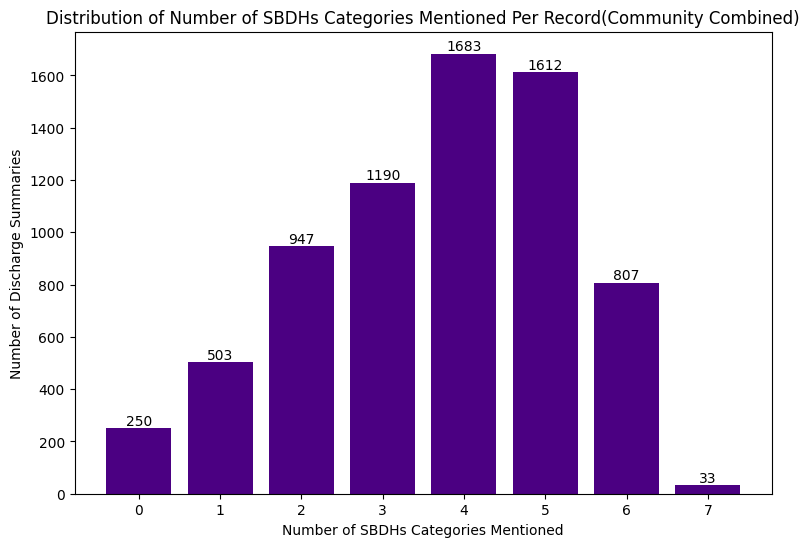

In [6]:
# For each record (row), count how many SBDH categories are mentioned (Community categories combined)
def count_sbdh(row):
    count = 0
    # If Community Present or Community Absent is mentioned (value == 1),
    # add one to the count of SDMH categories mentioned in this record
    if row['sdoh_community_present'] == 1 or row['sdoh_community_absent'] == 1:
        count += 1
    # If Education is mentioned (value == 1), add one
    if row['sdoh_education'] == 1:
        count += 1
    # # If Economics or Environment is mentioned (value 1 or 2), add one for each
    if row['sdoh_economics'] in [1, 2]:
        count += 1
    if row['sdoh_environment'] in [1, 2]:
        count += 1
     # If any Behavior category (Alcohol, Tobacco, Drug) is mentioned (value in 1-4), add one for each
    if row['behavior_alcohol'] in [1, 2, 3, 4]:
        count += 1
    if row['behavior_tobacco'] in [1, 2, 3, 4]:
        count += 1
    if row['behavior_drug'] in [1, 2, 3, 4]:
        count += 1
    return count

sbdh_counts = data_SBDH.apply(count_sbdh, axis=1)
distribution = sbdh_counts.value_counts()

# Plot
fig, axes = plt.subplots(figsize=(9, 6))
bars = plt.bar(distribution.index, distribution.values, color='indigo')

axes.bar_label(bars)

plt.xlabel('Number of SBDHs Categories Mentioned')
plt.ylabel('Number of Discharge Summaries')
plt.title('Distribution of Number of SBDHs Categories Mentioned Per Record(Community Combined)')
plt.savefig('descriptive1.png', dpi=300, bbox_inches='tight')
plt.show()

The result shows that out of the 7,025 annotated discharge summaries, 6775 ones (over 95%) discussed at least one category of SBDH.

### 2.4 Descriptive Statistics 2
### Frequency Diswtruibution of SDMH Discussions in Social History Sections()

The frequency of mentions for each SDMH category：
Community-Present: 4463
Community-Absent: 784
Education: 210
Economics: 2730
Environment: 4420
Alcohol Use: 3291
Tobacco Use: 4728
Drug Use: 2501


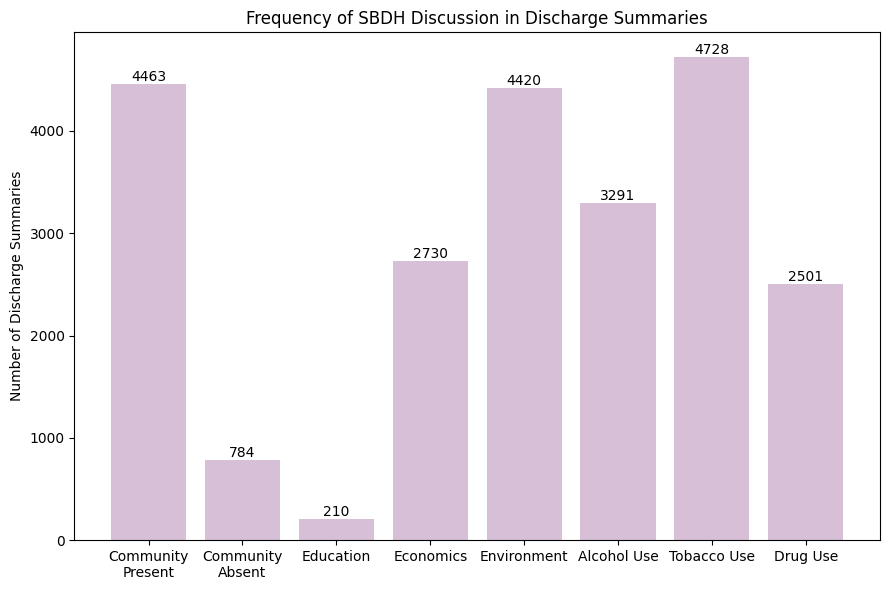

In [6]:
# Count how many times each category is actually discussed 
# (not None and not labeled as 'Unsure')
counts = {}

# Community-Present: 1 = discussed
# (discussed social support)
counts['Community-Present'] = (data_SBDH['sdoh_community_present'] == 1).sum()

# Community-Absent: 1 = discussed
# (discussed loss of social support)
counts['Community-Absent'] = (data_SBDH['sdoh_community_absent'] == 1).sum()

# Education: 1 = discussed
# (discussed the patient’s education such as schooling, college or degree)
counts['Education'] = (data_SBDH['sdoh_education'] == 1).sum()

# Economics: 1 or 2 discussed
# (1 discussed patient was currently employed, 2 discussed patient was unemployed (including retirement)
counts['Economics'] = data_SBDH['sdoh_economics'].isin([1, 2]).sum()

# Environment: 1 or 2 discussed
# (1 discussed any indication of housing, 2 discussed homeless)
counts['Environment'] = data_SBDH['sdoh_environment'].isin([1, 2]).sum()

# Alcohol Use: 2-4 discussed
# (2 discussed present use, 3 discussed past use, 4 discussed never use)
counts['Alcohol Use'] = data_SBDH['behavior_alcohol'].isin([2, 3, 4]).sum()

# Tobacco Use: 2-4 discussed
counts['Tobacco Use'] = data_SBDH['behavior_tobacco'].isin([2, 3, 4]).sum()

# Drug Use: 2-4 discussed
counts['Drug Use'] = data_SBDH['behavior_drug'].isin([2, 3, 4]).sum()

# 1. Print
print("The frequency of mentions for each SDMH category：")
for a, b in counts.items():
    print(f"{a}: {b}")

# 2.Plot
fig, axes = plt.subplots(figsize=(9, 6))
names = ["Community\nPresent", "Community\nAbsent", "Education", "Economics",
         "Environment", "Alcohol Use", "Tobacco Use", "Drug Use"]
bars = axes.bar(names, list(counts.values()), color='thistle')
axes.bar_label(bars)
axes.set_ylabel('Number of Discharge Summaries')
axes.set_title('Frequency of SBDH Discussion in Discharge Summaries')
plt.tight_layout()
plt.savefig('descriptive2.png', dpi=300, bbox_inches='tight')
plt.show()

The result shows that Community Present(4463), Tobacco Use(4728), and Environment(4420) are the topics discussed most frequently in the discharge summaries. In contrast, Community Absent(784) and Education(210) were discussed the least often.

### 2.5 Descriptive Statistics 3
### Distribution of Category States Across 8 SDMH Domains

In [8]:
columns = {
    'sdoh_community_present': {0: 'False', 1: 'True'},
    'sdoh_community_absent': {0: 'False', 1: 'True'},
    'sdoh_education': {0: 'False', 1: 'True'},
    'sdoh_economics': {0: 'None', 1: 'True', 2: 'False'},
    'sdoh_environment': {0: 'None', 1: 'True', 2: 'False'},
    'behavior_alcohol': {0: 'None', 1: 'Present', 2: 'Past', 3: 'Never', 4: 'Unsure'},
    'behavior_tobacco': {0: 'None', 1: 'Present', 2: 'Past', 3: 'Never', 4: 'Unsure'},
    'behavior_drug': {0: 'None', 1: 'Present', 2: 'Past', 3: 'Never', 4: 'Unsure'}
}

# Tables
for col, mapping in columns.items():
    counts = data_SBDH[col].value_counts()
    counts.index = counts.index.map(mapping)
    
    print("Category counts\n")
    print(counts)
    print('-' * 66)

Category counts

sdoh_community_present
True     4463
False    2562
Name: count, dtype: int64
------------------------------------------------------------------
Category counts

sdoh_community_absent
False    6241
True      784
Name: count, dtype: int64
------------------------------------------------------------------
Category counts

sdoh_education
False    6815
True      210
Name: count, dtype: int64
------------------------------------------------------------------
Category counts

sdoh_economics
None     4295
False    1742
True      988
Name: count, dtype: int64
------------------------------------------------------------------
Category counts

sdoh_environment
True     4357
None     2605
False      63
Name: count, dtype: int64
------------------------------------------------------------------
Category counts

behavior_alcohol
Never      2444
Present    2077
None       1657
Past        515
Unsure      332
Name: count, dtype: int64
--------------------------------------------------

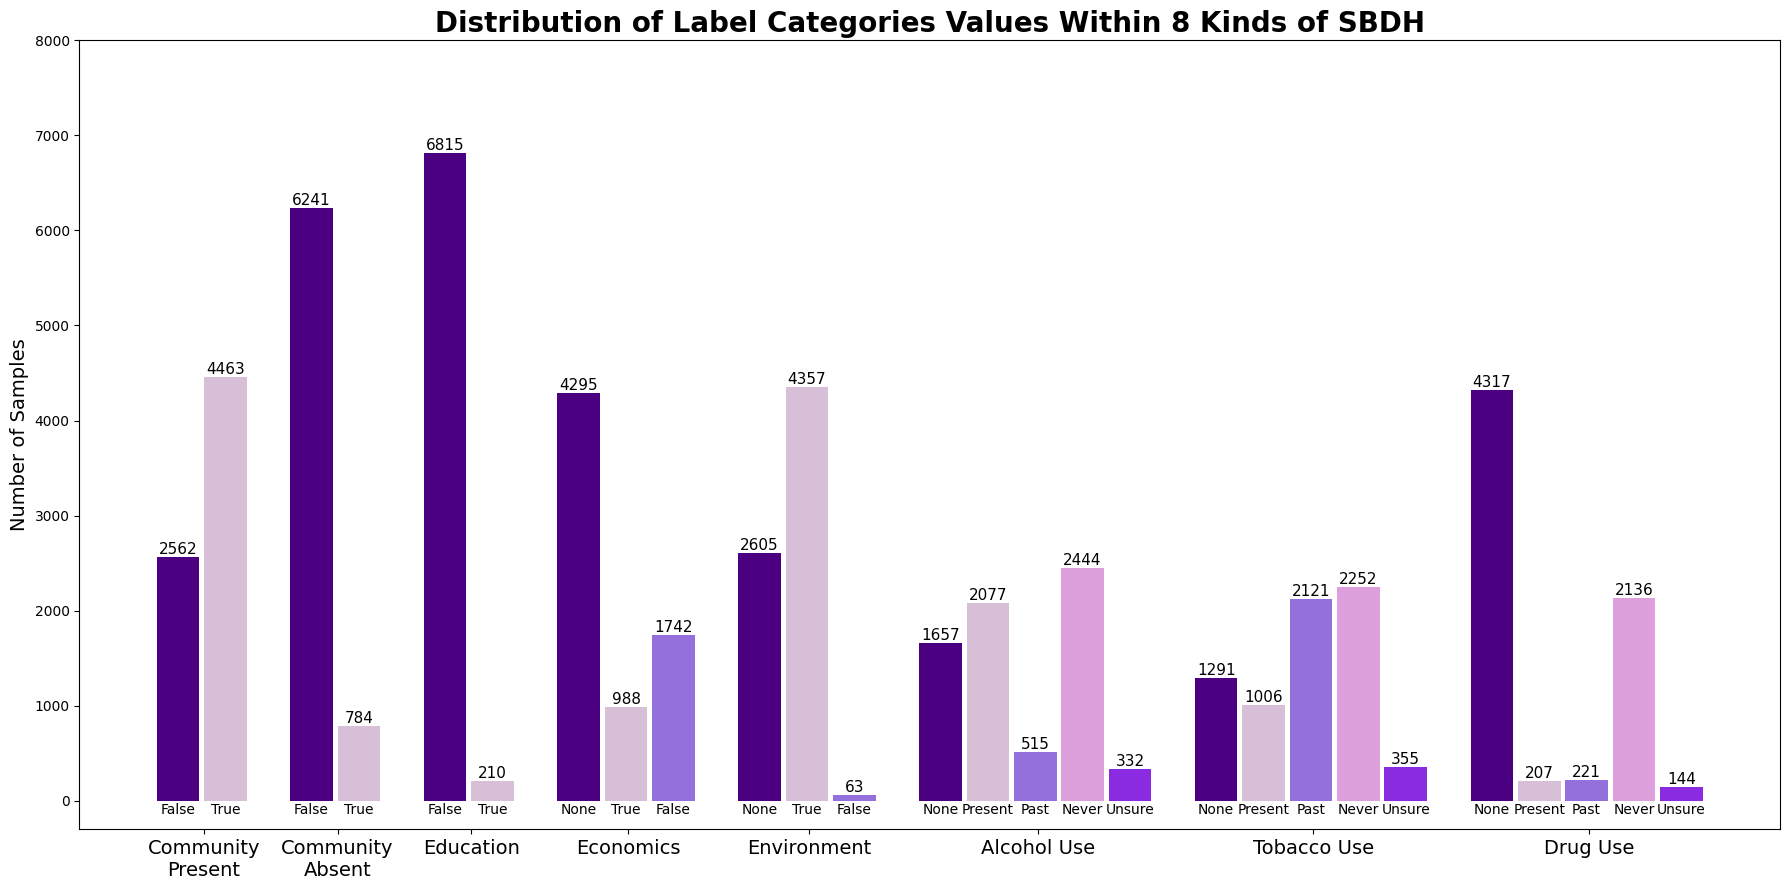

In [7]:
class_colors={0: '#4B0082', 1: 'thistle', 2: 'mediumpurple', 3: 'plum', 4: '#8A2BE2'}

# n_bars_per_label = [len(classes) for _, classes in label_info.values()]
# total_bars = sum(n_bars_per_label)
# total bars numbers = 2 + 2 + 2 + 3 + 3 + 5 + 5 + 5  = 27

group_gap = 0.2
width_available = 8 - group_gap * 7

label_widths = [2 / 27 * width_available, 2 / 27 * width_available, 2 / 27 * width_available, 3 / 27 * width_available,
                3 / 27 * width_available, 5 / 27 * width_available, 5 / 27 * width_available, 5 / 27 * width_available]
label_starts = []
start = 0
for width in label_widths:
    label_starts.append(start)
    start += width + group_gap

# Plot
fig, ax = plt.subplots(figsize=(18, 9))
current_x = 0

for idx, (col_name, mapping) in enumerate(columns.items()):
    classes = list(mapping.keys())
    labels = list(mapping.values())
    n_classes = len(classes)
    label_width = label_widths[idx]

    bar_width = label_width / n_classes * 0.9

    for j, cls_val in enumerate(classes):
        count = (data_SBDH[col_name] == cls_val).sum()
        x_pos = current_x + j * (label_width / n_classes) + bar_width / 2
        color = class_colors.get(cls_val) 
        ax.bar(x_pos, count, width=bar_width, color=color)
        ax.text(x_pos, count, str(count), ha='center', va='bottom', fontsize=11)
        ax.text(x_pos, -20, labels[j], ha='center', va='top', fontsize=10)
    current_x += label_width + group_gap

xticks = [start + w / 2 for start, w in zip(label_starts, label_widths)]
ax.set_xticks(xticks)

labelnames = ['Community\nPresent', 'Community\nAbsent', 'Education', 'Economics',
                   'Environment', 'Alcohol Use', 'Tobacco Use', 'Drug Use']
ax.set_xticklabels(labelnames, fontsize=14)

ax.set_ylabel('Number of Samples', fontsize=14)
ax.set_title('Distribution of Label Categories Values Within 8 Kinds of SBDH', fontsize=20, fontweight='bold')

ax.set_ylim(-300, 8000)
plt.tight_layout()
plt.savefig('descriptive3.png', dpi=300, bbox_inches='tight')
plt.show()

Distribution of Number of 8 kinds of SBDHs:

The result shows that overall the data is quite imbalanced across most variables.For example, in sdoh_education only 210 entries are marked True while 6815 are False. In behavior_drug most entries are None or Never, and only 207 are marked Present.

In [8]:
print(data_SBDH['social_history'].isna().sum())

0


# Task 3
## Traditional Model

Baseline Systems (conventional machine learning techniques)

### 3.1 ML preparation

#### 3.1.1 Import Packages

In [9]:
%pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install iterative-stratification

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import these packages requied to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# For multilavel stratified split
from sklearn.preprocessing import OneHotEncoder
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

#### 3.1.2 Split the dataset into train, val and testing dataset

https://github.com/trent-b/iterative-stratification

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [14]:
multi_cls_cols = ['sdoh_economics','sdoh_environment','behavior_alcohol', 'behavior_tobacco', 'behavior_drug']
binary_cls_cols = ['sdoh_community_present', 'sdoh_community_absent', 'sdoh_education']

encoder = OneHotEncoder(sparse_output=False)
y_multiclass_onehot = encoder.fit_transform(data_SBDH[multi_cls_cols])
y_binaryclass = data_SBDH[binary_cls_cols].values
y_full = np.hstack([y_multiclass_onehot, y_binaryclass])

# First Split: 70% (Train)，remain 30% (validation and test)
split1 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, val_test_index in split1.split(data_SBDH, y_full):

    # Second Split：In the remaining 30% validation and test set, split 15% validation, 15% test
    split2 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
    for subval_index, subtest_index in split2.split(data_SBDH.iloc[val_test_index], y_full[val_test_index]):
        val_index = val_test_index[subval_index]
        test_index = val_test_index[subtest_index]

data_train = data_SBDH.iloc[train_index].reset_index(drop=True)
data_val = data_SBDH.iloc[val_index].reset_index(drop=True)
data_test = data_SBDH.iloc[test_index].reset_index(drop=True)

print(f"Train : {len(data_train)}")
print(f"Val : {len(data_val)}")
print(f"Test : {len(data_test)}")

Train : 4917
Val : 1055
Test : 1053


#### 3.1.3 Comparison of Label Proportions Across Dataset Splits (Training, Validation, and Test Sets)

In [15]:
full_cols = binary_cls_cols + multi_cls_cols

print("Training set distribution:")
for col in full_cols:
    print(f"{col} distribution:")
    print(data_train[col].value_counts(normalize=True).to_string())
print("-" * 30)

print("Validation set distribution:")
for col in full_cols:
    print(f"{col} distribution:")
    print(data_val[col].value_counts(normalize=True).to_string())
print("-" * 30)

print("Test set distribution:")
for col in full_cols:
    print(f"{col} distribution:")
    print(data_test[col].value_counts(normalize=True).to_string())
print("-" * 30)

Training set distribution:
sdoh_community_present distribution:
sdoh_community_present
1    0.635347
0    0.364653
sdoh_community_absent distribution:
sdoh_community_absent
0    0.888347
1    0.111653
sdoh_education distribution:
sdoh_education
0    0.970104
1    0.029896
sdoh_economics distribution:
sdoh_economics
0    0.611348
2    0.247915
1    0.140736
sdoh_environment distribution:
sdoh_environment
1    0.620297
0    0.370755
2    0.008949
behavior_alcohol distribution:
behavior_alcohol
3    0.347976
1    0.295709
0    0.235916
2    0.073215
4    0.047183
behavior_tobacco distribution:
behavior_tobacco
3    0.320521
2    0.302013
0    0.183852
1    0.143177
4    0.050437
behavior_drug distribution:
behavior_drug
0    0.614399
3    0.304047
2    0.031523
1    0.029490
4    0.020541
------------------------------
Validation set distribution:
sdoh_community_present distribution:
sdoh_community_present
1    0.634123
0    0.365877
sdoh_community_absent distribution:
sdoh_community_abse

The result shows that the label distributions look relatively similar across the training, validation, and test sets, which means the stratified split worked well.

##### Save threedatasets to CSV files.

In [12]:
data_train.to_csv('data_train.csv', index=False)
data_val.to_csv('data_val.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

In [12]:
data_train.head()

,row_id,sdoh_community_present,sdoh_community_absent,sdoh_education,sdoh_economics,sdoh_environment,behavior_alcohol,behavior_tobacco,behavior_drug,TEXT,social_history
0,42,0,0,0,0,0,0,2,0,Admission Date: [**2174-8-6**] D...,Social history is significant for the absence ...
1,328,1,0,0,2,1,3,3,3,Admission Date: [**2198-4-22**] ...,"Married with three children, born in [**2184**..."
2,410,0,0,0,2,1,3,2,3,Admission Date: [**2146-7-15**] ...,The patient has a sixty-pack-year history of t...
3,416,0,0,0,2,1,0,0,3,Admission Date: [**2123-8-15**] ...,"Formerly worked in insurance, not working curr..."
4,671,1,0,0,2,1,2,2,3,Admission Date: [**2158-12-12**] ...,"Lives with his wife, retired plumbing/heating\..."


### 3.2 Preprocessing Function

I defined a preprocessing function to clean and normalize raw text data. This progress includes the steps:

Converts text to lowercase; Remove numbers; Remove punctations; Tokenizes the text into individual words Removes common English stopwords like 'the', 'of'; Lemmatize these words.

In [16]:
data_train = pd.read_csv('data_train.csv')
data_val = pd.read_csv('data_val.csv')
data_test = pd.read_csv('data_test.csv')

In [17]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
# New
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def get_clean_text(input_data):
    stopwords_modified=set(stopwords.words('english')) - {"no", "not", "nor", "without", "never"}

    input_data = input_data.lower()
    input_data = re.sub(r'\[\*\*.*?\*\*\]', '', input_data)
    input_data = re.sub(r'\d+', '', input_data)

    tokens = word_tokenize(input_data)
    tokens= [token for token in tokens if token not in string.punctuation] 
    lemmas = [WordNetLemmatizer().lemmatize(token) for token in tokens if token not in stopwords_modified]

    return ' '.join(lemmas)

# Apply preprocessing
data_train['clean_social_history']=data_train['social_history'].apply(get_clean_text)
data_val['clean_social_history'] = data_val['social_history'].apply(get_clean_text)
data_test['clean_social_history']=data_test['social_history'].apply(get_clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\k24034365\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k24034365\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\k24034365\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\k24034365\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Take a look at the text after the preprocessing

In [20]:
example=data_train['social_history'].iloc[99]
print(get_clean_text(example))

life married kid army lt. general quit tob year ago no etoh


In [21]:
data_train[['social_history', 'clean_social_history']].head()

,social_history,clean_social_history
0,Social history is significant for the absence ...,social history significant absence current tob...
1,"Married with three children, born in [**2184**...",married three child born life went worked acco...
2,The patient has a sixty-pack-year history of t...,patient sixty-pack-year history tobacco quit l...
3,"Formerly worked in insurance, not working curr...",formerly worked insurance not working currentl...
4,"Lives with his wife, retired plumbing/heating\...",life wife retired plumbing/heating tob smoked ...


### 3.3 Vectorization (TF-IDF)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer to count word frequencies without limiting the number of features
vocab_size = len(CountVectorizer().fit(data_train['clean_social_history']).get_feature_names_out())
print('Total vocabulary size (number of features):')
print(vocab_size)

Total vocabulary size (number of features):
4793


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_TFIDF = TfidfVectorizer().fit_transform(data_train['clean_social_history'])
X_dev_TFIDF = TfidfVectorizer().fit(data_train['clean_social_history']).transform(data_val['clean_social_history'])
X_test_TFIDF = TfidfVectorizer().fit(data_train['clean_social_history']).transform(data_test['clean_social_history'])

y_train = data_train[full_cols].values
y_dev = data_val[full_cols].values
y_test = data_test[full_cols].values

In [24]:
print(X_train_TFIDF.shape)
print(y_train.shape)
print(y_train[:5])

(4917, 4793)
(4917, 8)
[[0 0 0 0 0 0 2 0]
 [1 0 0 2 1 3 3 3]
 [0 0 0 2 1 3 2 3]
 [0 0 0 2 1 0 0 3]
 [1 0 0 2 1 2 2 3]]


### 3.4 Random Forest

#### 3.4.1 Buid Model (5 folds CV to tune the hyperparameters)

add the prefix estimator__. 

https://scikit-learn.org/stable/modules/grid_search.html#grid-search

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html

For the multi-output classification task, I referred to the above documentation. During hyperparameter tuning via grid search, the estimator_ prefix was used to tune the composite estimators.

Parameters were selected based on the article by Priyansh Soni. https://www.blog.trainindata.com/random-forest-with-grid-search/. Considering the computational time in the notebook environment, I selected a simplified set of key Random Forest hyperparameters and did not tune max_features.

In [22]:
from sklearn.multioutput import MultiOutputClassifier
# use make_scorer to define a function for evaluation during grid search
from sklearn.metrics import make_scorer

# Calculates the mean macro F1-score across 8 labels to as the performance metric for grid search hyperparameter tuning
def mean_macrof1(y_true, y_pred):
    f1s = []
    # Use for loop to calculate macro f1 over 8 label names and their indices
    for i in range(8):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average='macro')
        f1s.append(f1)
    return np.mean(f1s)

perlabel_rf = RandomForestClassifier(random_state=42)
multi_rf = MultiOutputClassifier(perlabel_rf)

# Add the prefix estimator__ to use the multi-output classifier
param_grid_rf = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [10, 20, None],
    'estimator__min_samples_split': [2, 5],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=multi_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring=make_scorer(mean_macrof1),
    verbose=1,
    n_jobs=-1
)

grid_search_rf.fit(X_train_TFIDF, y_train)

print("Best Parameters:")
print(grid_search_rf.best_params_)

print("Best CV Macro F1 Score: " + str(round(grid_search_rf.best_score_, 4)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
{'estimator__max_depth': 20, 'estimator__max_features': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
Best CV Macro F1 Score: 0.8323


#### 3.4.2 Test RandomForest Performance

In [26]:
# Make predictions
y_test_pred = grid_search_rf.best_estimator_.predict(X_test_TFIDF)

precision_macro = []
recall_macro = []
f1_macro = []

precision_weighted = []
recall_weighted = []
f1_weighted = []

# Use for loop to get the detailed classification refort for each category
for i in range(8):
    print("\nLabel: " + str(full_cols[i]))
    print(classification_report(y_test[:, i], y_test_pred[:, i], digits=4))

    # macro
    prec =precision_score(y_test[:, i], y_test_pred[:, i], average='macro')
    rec = recall_score(y_test[:, i], y_test_pred[:, i], average='macro')
    f1 = f1_score(y_test[:, i], y_test_pred[:, i], average='macro')

    precision_macro.append(prec)
    recall_macro.append(rec)
    f1_macro.append(f1)

    # weighted
    prec_w = precision_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    rec_w = recall_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    f1_w = f1_score(y_test[:, i], y_test_pred[:, i], average='weighted')

    precision_weighted.append(prec_w)
    recall_weighted.append(rec_w)
    f1_weighted.append(f1_w)

# The macro precision, recall, and F1-score were computed by averaging the per-label macro scores in the above classification report
print("-" * 30)
print("\nMacro-Average Results:")
print("Macro Precision: " + str(round(sum(precision_macro) / 8, 4)))
print("Macro Recall: " + str(round(sum(recall_macro) / 8, 4)))
print("Macro F1-Score: " + str(round(sum(f1_macro) /8, 4)))


# The weighted scores were computed by averaging the per-label weighted scores in the above classification report
print("\nWeighted-Average Results:")
print("Weighted Precision: " + str(round(sum(precision_weighted)/8, 4)))
print("Weighted Recall: " + str(round(sum(recall_weighted) / 8, 4)))
print("Weighted F1-Score: " + str(round(sum(f1_weighted) / 8, 4)))


Label: sdoh_community_present
              precision    recall  f1-score   support

           0     0.9271    0.9295    0.9283       383
           1     0.9596    0.9582    0.9589       670

    accuracy                         0.9478      1053
   macro avg     0.9434    0.9439    0.9436      1053
weighted avg     0.9478    0.9478    0.9478      1053


Label: sdoh_community_absent
              precision    recall  f1-score   support

           0     0.9658    0.9979    0.9816       935
           1     0.9770    0.7203    0.8293       118

    accuracy                         0.9668      1053
   macro avg     0.9714    0.8591    0.9054      1053
weighted avg     0.9671    0.9668    0.9645      1053


Label: sdoh_education
              precision    recall  f1-score   support

           0     0.9990    0.9912    0.9951      1022
           1     0.7692    0.9677    0.8571        31

    accuracy                         0.9905      1053
   macro avg     0.8841    0.9795    0.9261 

### 3.5 XGBoost

#### 3.5.1 Buid XGBoost Model (5 folds CV to tune the hyperparameters)

In [25]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 7.4 MB/s eta 0:00:17
   - -------------------------------------- 3.7/124.9 MB 9.1 MB/s eta 0:00:14
   -- ------------------------------------- 7.1/124.9 MB 11.5 MB/s eta 0:00:11
   --- ------------------------------------ 11.3/124.9 MB 13.8 MB/s eta 0:00:09
   ----- ---------------------------------- 16.0/124.9 MB 15.5 MB/s eta 0:00:08
   ------ --------------------------------- 21.8/124.9 MB 17.4 MB/s eta 0:00:06
   --------- ------------------------------ 28.6/124.9 MB 19.7 MB/s eta 0:00:05
   ----------- ---------------------------- 36.2/124.9 MB 21.7 MB/s eta 0:00:05
   -------------- ------------------------- 44.0/124.9 MB 23.3 MB/s eta 0:00:04
   ---------------- ----------------------- 53.0/124.9 MB 25.4 MB/s eta 0:00:03
   ------------------- -------------------- 62.4/124.9 MB 27.4 MB/s eta 0:00:03
   ----------------------- ---------------- 72.4/124.9

In [27]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer, f1_score

def mean_macrof1(y_true, y_pred):
    f1s = []
    # Use for loop to calculate macro f1 over 8 label names and their indices
    for i in range(8):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average='macro')
        f1s.append(f1)
    return np.mean(f1s)

perlabel_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
multi_xgb = MultiOutputClassifier(perlabel_xgb)
# Add the prefix estimator__ to define the hyperparameter search space to  use the multi-output classifie
param_grid_xgb= {'estimator__n_estimators': [100, 200], 'estimator__max_depth': [3, 5, 7],
              'estimator__learning_rate': [0.01, 0.1, 0.2], 'estimator__subsample': [0.8, 1.0],
              'estimator__min_child_weight':[1, 3, 5]}

grid_search_xgb = GridSearchCV(
    estimator=multi_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    # Use thesame performance score (Macro f1) in the random forest 
    scoring=make_scorer(mean_macrof1),
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_TFIDF, y_train)

print("Best Parameters:")
print(grid_search_xgb.best_params_)
print("Best CV Macro F1 Score: " + str(round(grid_search_xgb.best_score_, 4)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'estimator__learning_rate': 0.2, 'estimator__max_depth': 5, 'estimator__min_child_weight': 1, 'estimator__n_estimators': 200, 'estimator__subsample': 1.0}
Best CV Macro F1 Score: 0.8391


#### 3.4.2 Test XGBoost Performance

In [29]:
# Make predictions
y_test_pred = grid_search_xgb.best_estimator_.predict(X_test_TFIDF)

precision_macro = []
recall_macro = []
f1_macro = []

precision_weighted = []
recall_weighted = []
f1_weighted =[]

# Use for loop to get the detailed classification refort for each category
for i in range(8):
    print("\nLabel: " + str(full_cols[i]))
    print(classification_report(y_test[:, i], y_test_pred[:, i], digits=4))

    # macro
    prec = precision_score(y_test[:, i], y_test_pred[:, i], average='macro')
    rec = recall_score(y_test[:, i], y_test_pred[:, i], average='macro')
    f1 = f1_score(y_test[:, i], y_test_pred[:, i], average='macro')

    precision_macro.append(prec)
    recall_macro.append(rec)
    f1_macro.append(f1)

    # weighted
    prec_w = precision_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    rec_w = recall_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    f1_w = f1_score(y_test[:, i], y_test_pred[:, i], average='weighted')

    precision_weighted.append(prec_w)
    recall_weighted.append(rec_w)
    f1_weighted.append(f1_w)

# The macro precision, recall, and F1-score were computed by averaging the per-label macro scores in the above classification report
print("-" * 30)
print("\nMacro-Average Results:")
print("Macro Precision: " + str(round(sum(precision_macro) / 8, 4)))
print("Macro Recall: " + str(round(sum(recall_macro) / 8, 4)))
print("Macro F1-Score: " + str(round(sum(f1_macro) /8, 4)))


# The weighted scores were computed by averaging the per-label weighted scores in the above classification report
print("\nWeighted-Average Results:")
print("Weighted Precision: " + str(round(sum(precision_weighted)/8, 4)))
print("Weighted Recall: " + str(round(sum(recall_weighted) / 8, 4)))
print("Weighted F1-Score: " + str(round(sum(f1_weighted) / 8, 4)))


Label: sdoh_community_present
              precision    recall  f1-score   support

           0     0.9493    0.9295    0.9393       383
           1     0.9602    0.9716    0.9659       670

    accuracy                         0.9563      1053
   macro avg     0.9548    0.9506    0.9526      1053
weighted avg     0.9562    0.9563    0.9562      1053


Label: sdoh_community_absent
              precision    recall  f1-score   support

           0     0.9666    0.9914    0.9789       935
           1     0.9149    0.7288    0.8113       118

    accuracy                         0.9620      1053
   macro avg     0.9408    0.8601    0.8951      1053
weighted avg     0.9608    0.9620    0.9601      1053


Label: sdoh_education
              precision    recall  f1-score   support

           0     0.9883    0.9961    0.9922      1022
           1     0.8261    0.6129    0.7037        31

    accuracy                         0.9848      1053
   macro avg     0.9072    0.8045    0.8480 

### 3.6 Logistic Regression

#### 3.6.1 Buid Logistic Regression Model (5 folds CV to tune the hyperparameters)

In [40]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

# Calculates the mean macro F1-score across 8 labels to as the performance metric for grid search hyperparameter tuning
def mean_macrof1(y_true, y_pred):
    f1s= []
    # Use for loop to calculate macro f1 over 8 label names and their indices
    for i in range(8):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average='macro')
        f1s.append(f1)
    return np.mean(f1s)


perlabel_lr = LogisticRegression(max_iter=1000,random_state=42)
multi_lr = MultiOutputClassifier(perlabel_lr)
# Add the prefix estimator__ to define the hyperparameter search space to  use the multi-output classifie
param_grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}

grid_search_lr = GridSearchCV(
    estimator=multi_lr,
    param_grid=param_grid_lr,
    cv=5,
    # Use thesame performance score (Macro f1) in the random forest 
    scoring=make_scorer(mean_macrof1),
    verbose=1,
    n_jobs=-1
)

grid_search_lr.fit(X_train_TFIDF, y_train)

print("Best Parameters:")
print(grid_search_lr.best_params_)
print("Best CV Macro F1 Score: " + str(round(grid_search_lr.best_score_, 4)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:
{'estimator__C': 100}
Best CV Macro F1 Score: 0.7762


#### 3.4.2 Test Logistic Regression Performance

In [39]:
# Make predictions
y_test_pred = grid_search_lr.best_estimator_.predict(X_test_TFIDF)

precision_macro = []
recall_macro = []
f1_macro = []

precision_weighted = []
recall_weighted = []
f1_weighted =[]

# Use for loop to get the detailed classification refort for each category
for i in range(8):
    print("\nLabel: " + str(full_cols[i]))
    print(classification_report(y_test[:, i], y_test_pred[:, i], digits=4))

    # macro
    prec = precision_score(y_test[:, i], y_test_pred[:, i], average='macro')
    rec = recall_score(y_test[:, i], y_test_pred[:, i], average='macro')
    f1 = f1_score(y_test[:, i], y_test_pred[:, i], average='macro')

    precision_macro.append(prec)
    recall_macro.append(rec)
    f1_macro.append(f1)

    # weighted
    prec_w = precision_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    rec_w = recall_score(y_test[:, i], y_test_pred[:, i], average='weighted')
    f1_w = f1_score(y_test[:, i], y_test_pred[:, i], average='weighted')

    precision_weighted.append(prec_w)
    recall_weighted.append(rec_w)
    f1_weighted.append(f1_w)

# The macro precision, recall, and F1-score were computed by averaging the per-label macro scores in the above classification report
print("-" * 30)
print("\nMacro-Average Results:")
print("Macro Precision: " + str(round(sum(precision_macro) / 8, 4)))
print("Macro Recall: " + str(round(sum(recall_macro) / 8, 4)))
print("Macro F1-Score: " + str(round(sum(f1_macro) /8, 4)))


# The weighted scores were computed by averaging the per-label weighted scores in the above classification report
print("\nWeighted-Average Results:")
print("Weighted Precision: " + str(round(sum(precision_weighted)/8, 4)))
print("Weighted Recall: " + str(round(sum(recall_weighted) / 8, 4)))
print("Weighted F1-Score: " + str(round(sum(f1_weighted) / 8, 4)))


Label: sdoh_community_present
              precision    recall  f1-score   support

           0     0.9324    0.9008    0.9163       383
           1     0.9444    0.9627    0.9534       670

    accuracy                         0.9402      1053
   macro avg     0.9384    0.9317    0.9349      1053
weighted avg     0.9400    0.9402    0.9399      1053


Label: sdoh_community_absent
              precision    recall  f1-score   support

           0     0.9556    0.9893    0.9721       935
           1     0.8824    0.6356    0.7389       118

    accuracy                         0.9497      1053
   macro avg     0.9190    0.8124    0.8555      1053
weighted avg     0.9474    0.9497    0.9460      1053


Label: sdoh_education
              precision    recall  f1-score   support

           0     0.9865    0.9990    0.9927      1022
           1     0.9444    0.5484    0.6939        31

    accuracy                         0.9858      1053
   macro avg     0.9655    0.7737    0.8433 

# Task 4
## Neuro Network Models

## 4.1 CNN

In this part, I used the popular neural network API Keras that I learned from the course to build a CNN classifer to classify sentences in PubMed RCT abstracts. I uses the TensorFlow, which is a very widely used machine learning library to biuld deep learning models.

A TensorFlow environment was set up in my Jupyter Notebook to get a correct and consistent computational environment. This environment was activated using Conda, and many different essential tools were installed to do these analysis that I need. And this environment is saved as a Jupyter kernel in my computer.

### 4.1.1 Import Packages & Setup
First, I installed the  TensorFlow library to enable building and training deep learning models.

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [26]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### 4.1.2 Parameters for CNN

After extensive experimentation and comparison of various hyperparameter settings, I identified the following parameter values to balance model complexity and generalization ability effectively for this CNN model:

1) Batch size: 32 (the number of documents processed during training)
2) Sequence length: 100
3) Max features: 5000
4) Embedding dimension: 96 (number of dimensions in the word embedding space)
5) Embedding dropout: 0.2 (embedding layer dropout rate)
6) Filters: 32 (the number of output filters in the convolutional layer)
7) Kernel size: 3 (Length of the convolution window)
8) Dense dropout: 0.3 (dense hidden layer dropout rate)
9) Hidden units: 64
10) Epochs: 100

These parameters were set to balance model complexity and generalization ability effectively for our dataset.

In [27]:
# Set these parameters to improve the accuracy on the validation dataset
max_feature=5500
embedding_dim=96
embedding_dropout=0.25
filters =128
kernel_size1=3
kernel_size2=3
dense_dropout=0.25
hidden_units=64
sequence_length=60
batch_size=32
epochs =128

### 4.1.3 Vectorization & Convert to tensors (Prepare labels and text data for multi-task CNN model)

Vectorise the text:

I create a TextVectorization layer to convert raw text into token sequences suitable for input into the neural network, and then adapt method on the training texts that allows the layer to build a vocabulary from the training dataset.

Next, I use a function to converts Pandas DataFrame into a TensorFlow dataset object. This makes it convenient to enable efficient training in the next step.

In [28]:
from collections import Counter
all_text = " ".join(data_train['clean_social_history'].values)
word_counts = Counter(all_text.split())
print(len(word_counts))  # Set max_feature as 5500

5422


##### Text Vectorization

In [29]:
vectorize_layer = layers.TextVectorization(
    max_tokens=max_feature,
    output_mode='int',
    output_sequence_length=sequence_length
)

train_texts = data_train['clean_social_history'].tolist()
val_texts = data_val['clean_social_history'].tolist()
test_texts = data_test['clean_social_history'].tolist()

# Directly adapt the TextVectorization layer on the preprocessed cleaned text
vectorize_layer.adapt(train_texts)

In [30]:
# Extracts label arrays for eight tasks from training and validation data
train_ylist = [data_train[col].values for col in full_cols]
val_ylist = [data_val[col].values for col in full_cols]

# Convert the training and validation text lists into TensorFlow string tensors
train_texts_tensor = tf.convert_to_tensor(np.array(train_texts).reshape(-1,1), dtype=tf.string)
val_texts_tensor = tf.convert_to_tensor(np.array(val_texts).reshape(-1,1), dtype=tf.string)

### 4.1.4 Alter the Multi-Task CNN Model

These are the steps altering the model to try to improve the performances

·    Add new layers into the model and changed the width of the layers, and both have ReLu activation

·    Add the early stopping

·    Add dropout layers（0.25）

·    Reduce the batch size to 32

·    Add L2 regularization

In [38]:
def create_cnn_multitask():
    inputs = layers.Input(shape=(1,), dtype=tf.string)
    x = vectorize_layer(inputs)
    x = layers.Embedding(max_feature, embedding_dim)(x)
    x = layers.Dropout(embedding_dropout)(x)
    x = layers.Conv1D(filters=filters, kernel_size=2, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters=filters, kernel_size=3, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dense(hidden_units, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dropout(dense_dropout)(x)
    # As this is a multi-task model, set 8 output layers based on the same CNN learning layers
    outputs = [
        layers.Dense(2, activation='softmax', name='sdoh_community_present')(x),
        layers.Dense(2, activation='softmax', name='sdoh_community_absent')(x),
        layers.Dense(2, activation='softmax', name='sdoh_education')(x),
        layers.Dense(3, activation='softmax', name='sdoh_economics')(x),
        layers.Dense(3, activation='softmax', name='sdoh_environment')(x),
        layers.Dense(5, activation='softmax', name='behavior_alcohol')(x),
        layers.Dense(5, activation='softmax', name='behavior_tobacco')(x),
        layers.Dense(5, activation='softmax', name='behavior_drug')(x)
    ]

    return models.Model(inputs=inputs, outputs=outputs)

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/metrics.py

#### Set up validation metric monitoring

Define two custom metric classes, BinaryF1 and MacroF1, to calculate the F1 score for binary and multi-class tasks, respectively, and assigns the corresponding validation metrics for each task.

In [107]:
# Define custom metrics for monitoring

# ① Calculate F1 score for class 1 in binary classification tasks

class BinaryF1(tf.keras.metrics.Metric):
    def __init__(self, name='binary_f1', **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='tp', initializer='zeros')
        self.fp = self.add_weight(name='fp', initializer='zeros')
        self.fn = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_label = tf.argmax(y_pred, axis=-1)
        y_true = tf.cast(y_true, tf.int64)

        tp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_pred_label, 1), tf.equal(y_true, 1)), tf.float32))
        fp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_pred_label, 1), tf.not_equal(y_true, 1)), tf.float32))
        fn = tf.reduce_sum(tf.cast(tf.logical_and(tf.not_equal(y_pred_label, 1), tf.equal(y_true, 1)), tf.float32))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)
    
    def result(self):
        # Add a small 1e-6 to avoid division by zero and then avoid NaN or -Inf values during early training stages
        precision=self.tp / (self.tp + self.fp+ 1e-6)
        recall=self.tp / (self.tp + self.fn+ 1e-6)
        return 2* precision * recall / (precision + recall+ 1e-6)

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# ②Calculate macro F1 score for multi-class classification tasks
class MacroF1(tf.keras.metrics.Metric):
    def __init__(self, num_classes, name='macro_f1', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.tp = self.add_weight(shape=(num_classes,), initializer='zeros', name='tp')
        self.fp = self.add_weight(shape=(num_classes,), initializer='zeros', name='fp')
        self.fn = self.add_weight(shape=(num_classes,), initializer='zeros', name='fn')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_label = tf.argmax(y_pred, axis=-1)
        y_true = tf.cast(y_true, tf.int32)

        for i in range(self.num_classes):
            y_true_i = tf.equal(y_true, i)
            y_pred_i = tf.equal(y_pred_label, i)

            tp = tf.reduce_sum(tf.cast(tf.logical_and(y_true_i, y_pred_i), tf.float32))
            fp = tf.reduce_sum(tf.cast(tf.logical_and(tf.logical_not(y_true_i), y_pred_i), tf.float32))
            fn = tf.reduce_sum(tf.cast(tf.logical_and(y_true_i, tf.logical_not(y_pred_i)), tf.float32))

            self.tp.assign_add(tf.one_hot(i, self.num_classes) * tp)
            self.fp.assign_add(tf.one_hot(i, self.num_classes) * fp)
            self.fn.assign_add(tf.one_hot(i, self.num_classes) * fn)


    def result(self):
        precision = self.tp / (self.tp + self.fp+ 1e-6)
        recall = self.tp / (self.tp + self.fn+ 1e-6)
        f1 = 2 * precision * recall / (precision + recall+ 1e-6)
        return tf.reduce_mean(f1)

    #def reset_states(self):
        #self.tp.assign(tf.zeros_like(self.tp))
        #self.fp.assign(tf.zeros_like(self.fp))
        #self.fn.assign(tf.zeros_like(self.fn))
        #self.tp.assign(tf.constant(0, shape=self.tp.shape))
        #self.fp.assign(tf.constant(0, shape=self.fp.shape))
        #self.fn.assign(tf.constant(0, shape=self.fn.shape))

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)


# Set up metrics to monitor on the validation set for each task each epoch
metrics={}
for category in binary_cls_cols:
    # Binary
    metrics[category] = [BinaryF1(name ='f1')]
for category in multi_cls_cols:
    # Multi-class classification: (lenth = 3 or 5)
    metrics[category] = [MacroF1(num_classes=len(columns[category]),name='macro_f1')]

#### Add Early Stop 

##### https://medium.com/biased-algorithms/a-practical-guide-to-implementing-early-stopping-in-pytorch-for-model-training-99a7cbd46e9d

MultiMetricEarlyStopping Callback：

As this is a multi-task learning with imbalanced data, a callback based on multiple validation F1-score metrics is used.
It averages these F1 scores each epoch and stops training if the average doesn't improve for a given 15 patience.
Refer to https://github.com/keras-team/keras-io/blob/master/guides/writing_your_own_callbacks.py

In [108]:
class EarlyStopping(Callback):
    def __init__(self, monitor_metrics, patience=5):
        
        super().__init__()
        self.monitor_metrics = monitor_metrics
        self.patience = patience
        self.wait=0
        # best to store the model
        self.best=None
        self.stopped_epoch=0
    
    def on_train_begin(self, logs=None):
        self.wait=0
        self.stopped_epoch=0
        self.best = -np.inf
            
    # Use logs to get metric values of the current epoch, average them, then compare with the best 
    def on_epoch_end(self, epoch, logs=None):


        # Get the current epoch's values for all metrics and then simply calculate the mean value
        currentf1s = []
        for category in self.monitor_metrics:
            #value = logs.get(metric_name)
            # logs[metric_name]
            #current_metrics.append(value)
            currentf1s.append(logs[category])
        
        current_score = sum(currentf1s)/8

        if current_score > self.best:
            # Current combined metric improved, update the best score and reset patience wait counter
            self.best =current_score
            self.wait = 0
            # print(f"[Epoch {epoch+1}] Combined metric improved to {self.best:.4f};  reset wait counter")
            print("Combined metric improved to " + format(self.best, ".4f") + "; reset wait counter")
            print("-" * 30)
        else:
            # There is no improvement, increase patient wait counter
            self.wait+=1
            #print(f"[Epoch {epoch+1}] No improvement (current {current_score:.4f}, best {self.best:.4f}), wait {self.wait}/{self.patience}")
            #print("No improvement (current " + format(current_score, ".4f") + ", best " + format(self.best, ".4f") + "), wait " + str(self.wait) + "/" + str(self.patience))
            print("No improvement current: " + format(current_score, ".4f"))
            print("Best: "+format(self.best, ".4f"))
            print("Wait: "+str(self.wait) + "/" + str(self.patience))
            print("-" * 30)
            if self.wait >= self.patience:
                self.stopped_epoch = epoch + 1
                # Signal to stop training
                self.model.stop_training= True

                print("Training stopped early as there is no improvement for " + str(self.patience) + " epochs\nSo END Training.")


early_stop = EarlyStopping(
    monitor_metrics = ['val_behavior_alcohol_macro_f1','val_behavior_drug_macro_f1','val_behavior_tobacco_macro_f1',
    'val_sdoh_community_absent_f1','val_sdoh_community_present_f1','val_sdoh_economics_macro_f1','val_sdoh_education_f1',
    'val_sdoh_environment_macro_f1',], patience=15,
)

#### 4.1.5 Compile the module

In [ ]:
model13 = create_cnn_multitask()

model13.compile(
    optimizer='adam',
    loss={name: 'sparse_categorical_crossentropy' for name in full_cols},
    metrics=metrics
)

In [68]:
history_13 = model13.fit(
    train_texts_tensor,
    train_ylist,
    validation_data=(val_texts_tensor, val_ylist),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/128
Combined metric improved to 0.1206; reset wait counter
------------------------------
154/154 - 8s - 53ms/step - behavior_alcohol_loss: 1.4945 - behavior_alcohol_macro_f1: 0.4068 - behavior_drug_loss: 0.9990 - behavior_drug_macro_f1: 0.3545 - behavior_tobacco_loss: 1.5837 - behavior_tobacco_macro_f1: 0.4100 - loss: 7.2120 - sdoh_community_absent_f1: 0.2532 - sdoh_community_absent_loss: 0.4126 - sdoh_community_present_f1: 0.7867 - sdoh_community_present_loss: 0.6825 - sdoh_economics_loss: 1.0661 - sdoh_economics_macro_f1: 0.4713 - sdoh_education_f1: 0.1217 - sdoh_education_loss: 0.1924 - sdoh_environment_loss: 0.7653 - sdoh_environment_macro_f1: 0.4862 - val_behavior_alcohol_loss: 1.5029 - val_behavior_alcohol_macro_f1: 0.0764 - val_behavior_drug_loss: 1.5205 - val_behavior_drug_macro_f1: 0.1438 - val_behavior_tobacco_loss: 1.6342 - val_behavior_tobacco_macro_f1: 0.0628 - val_loss: 8.5145 - val_sdoh_community_absent_f1: 0.0809 - val_sdoh_community_absent_loss: 0.6506 - val_s

#### 4.1.6 Test CNN Performance

In [70]:
# Smae as above, Convert the training and validation text lists into TensorFlow string tensors
test_texts_tensor = tf.convert_to_tensor(np.array(test_texts).reshape(-1, 1), dtype=tf.string)
# Smae as above, extracts label arrays for eight tasks from training and validation data
test_ylist = [data_test[col].values for col in full_cols]


y_test_preds = model13.predict(test_texts_tensor)
#y_test_pred_labels = [np.argmax(pred, axis=1) for pred in y_test_preds]
predicted_labels = []
for pred in y_test_preds:
    predicted_label = np.argmax(pred, axis=1)
    predicted_labels.append(predicted_label)

precision_macro = []
recall_macro = []
f1_macro = []
accuracy_list = []

precision_weighted = []
recall_weighted = []
f1_weighted = []

#for i, label in enumerate(full_cols):
for i in range(8):
    y_true = test_ylist[i]
    y_pred = predicted_labels[i]

    print("\nLabel: " + str(full_cols[i]))
    print(classification_report(test_ylist[i], predicted_labels[i], digits=4))

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)

    precision_macro.append(precision)
    recall_macro.append(recall)
    f1_macro.append(f1)
    accuracy_list.append(acc)

    precision_w = precision_score(y_true, y_pred, average='weighted')
    recall_w = recall_score(y_true, y_pred, average='weighted')
    f1_w = f1_score(y_true, y_pred, average='weighted')

    precision_weighted.append(precision_w)
    recall_weighted.append(recall_w)
    f1_weighted.append(f1_w)

print("\nCNN Macro-Average Results:")
print("Macro Precision: " + str(round(sum(precision_macro) / 8, 4)))
print("Macro Recall: " + str(round(sum(recall_macro) / 8, 4)))
print("Macro F1-Score: " + str(round(sum(f1_macro) / 8, 4)))
print("Macro Accuracy: " + str(round(sum(accuracy_list) / 8, 4)))

print("\nCNN Weighted-Average Results:")
print("Weighted Precision: " + str(round(sum(precision_weighted) / 8, 4)))
print("Weighted Recall: " + str(round(sum(recall_weighted) / 8, 4)))
print("Weighted F1-Score: " + str(round(sum(f1_weighted) / 8, 4)))

# Clear Classific Refort
print("\nCNN Detailed per Category Evaluation:")

for i in range(8):
    print("Category:" + full_cols[i])
    print("Accuracy:" + str(round(accuracy_list[i], 4)))
    print("Precision:" + str(round(precision_macro[i], 4)))
    print("Recall:" + str(round(recall_macro[i], 4)))
    print("F1 Score: " + str(round(f1_macro[i], 4)))
    print('-' * 30)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Label: sdoh_community_present
              precision    recall  f1-score   support

           0     0.9697    0.9191    0.9437       383
           1     0.9551    0.9836    0.9691       670

    accuracy                         0.9601      1053
   macro avg     0.9624    0.9513    0.9564      1053
weighted avg     0.9604    0.9601    0.9599      1053


Label: sdoh_community_absent
              precision    recall  f1-score   support

           0     0.9736    0.9861    0.9798       935
           1     0.8774    0.7881    0.8304       118

    accuracy                         0.9639      1053
   macro avg     0.9255    0.8871    0.9051      1053
weighted avg     0.9628    0.9639    0.9631      1053


Label: sdoh_education
              precision    recall  f1-score   support

           0     0.9932    0.9961    0.9946      1022
           1     0.8571    0.7742    0.8136        31

    accuracy                         0.9896      1053
   ma

## 4.2 LSTM

Then I build a BiLSTM model that could incorporate the current sentence along with its context, and it might be better at capturing long-range dependencies in text.

### 4.1.2 Parameters for LSTM

After extensive experimentation and comparison of various hyperparameter settings, I identified the following parameter values to balance model complexity and generalization ability effectively for this CNN model:

1) Batch size: 32 (the number of documents processed during training)
2) Sequence length: 60
3) Max features: 5500
4) Embedding dimension: 96 (number of dimensions in the word embedding space)
5) Embedding dropout: 0.2 (embedding layer dropout rate)
6) Filters: 32 (the number of output filters in the convolutional layer)
8) Dense dropout: 0.4 (dense hidden layer dropout rate)
9) Hidden units: 64
10) Epochs: 100

These parameters were set to balance model complexity and generalization ability effectively for our dataset.

In [109]:
# Set these parameters to improve the accuracy on the validation dataset
max_feature = 5500
embedding_dim = 96
embedding_dropout = 0.2
dense_dropout = 0.4
# hidden_units = 64
hidden_units = 128
sequence_length = 60
batch_size = 32
epochs = 128

### 4.2.1 Alter the Multi-Task LSTM Model

These are the steps altering the model to try to improve the performances

· Add new layers into the model and changed the width of the layers, and both have ReLu activation

· Add the early stopping

· Add dropout layers（0.25）

· Reduce the batch size to 32

· Add L2 regularization

#### 4.1.5 Compile the module

In [110]:
def bilstm2():
    inputs = layers.Input(shape=(1,), dtype=tf.string)
    x = vectorize_layer(inputs)

    x = layers.Embedding(input_dim=max_feature, output_dim=embedding_dim)(x)
    #x = layers.Dropout(embedding_dropout)(x)
    x = layers.SpatialDropout1D(embedding_dropout)(x)

    x = layers.Bidirectional(layers.LSTM(units=64, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(units=64, return_sequences=True))(x)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.GlobalAveragePooling1D()(x)

    x = layers.Dense(hidden_units, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dropout(dense_dropout)(x)
    x = layers.Dense(64, activation='relu')(x)


    outputs = [
        layers.Dense(2, activation='softmax', name='sdoh_community_present')(x),
        layers.Dense(2, activation='softmax', name='sdoh_community_absent')(x),
        layers.Dense(2, activation='softmax', name='sdoh_education')(x),
        layers.Dense(3, activation='softmax', name='sdoh_economics')(x),
        layers.Dense(3, activation='softmax', name='sdoh_environment')(x),
        layers.Dense(5, activation='softmax', name='behavior_alcohol')(x),
        layers.Dense(5, activation='softmax', name='behavior_tobacco')(x),
        layers.Dense(5, activation='softmax', name='behavior_drug')(x)
    ]

    return models.Model(inputs=inputs, outputs=outputs)

In [114]:
model_lstm13 = bilstm2()

model_lstm13.compile(
    optimizer='adam',
    loss={name: 'sparse_categorical_crossentropy' for name in full_cols},
    metrics=metrics
)

In [115]:
history_lstm13 = model_lstm13.fit(
    x =train_texts_tensor,
    y = train_ylist,
    validation_data=(val_texts_tensor, val_ylist),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/128
Combined metric improved to 0.2825; reset wait counter
------------------------------
154/154 - 12s - 78ms/step - behavior_alcohol_loss: 1.4085 - behavior_alcohol_macro_f1: 0.3411 - behavior_drug_loss: 0.9457 - behavior_drug_macro_f1: 0.3049 - behavior_tobacco_loss: 1.4862 - behavior_tobacco_macro_f1: 0.3487 - loss: 6.6653 - sdoh_community_absent_f1: 0.2530 - sdoh_community_absent_loss: 0.3508 - sdoh_community_present_f1: 0.7850 - sdoh_community_present_loss: 0.6596 - sdoh_economics_loss: 0.9046 - sdoh_economics_macro_f1: 0.4365 - sdoh_education_f1: 0.1603 - sdoh_education_loss: 0.1606 - sdoh_environment_loss: 0.7394 - sdoh_environment_macro_f1: 0.4475 - val_behavior_alcohol_loss: 1.2906 - val_behavior_alcohol_macro_f1: 0.2631 - val_behavior_drug_loss: 0.8308 - val_behavior_drug_macro_f1: 0.1890 - val_behavior_tobacco_loss: 1.3679 - val_behavior_tobacco_macro_f1: 0.2824 - val_loss: 6.0304 - val_sdoh_community_absent_f1: 0.0492 - val_sdoh_community_absent_loss: 0.3219 - val_

#### 4.1.6 Test LSTM Performance

In [117]:
# Smae as above, Convert the training and validation text lists into TensorFlow string tensors
test_texts_tensor = tf.convert_to_tensor(np.array(test_texts).reshape(-1, 1), dtype=tf.string)
# Smae as above, extracts label arrays for eight tasks from training and validation data
test_ylist = [data_test[col].values for col in full_cols]

y_test_preds = model_lstm13.predict(test_texts_tensor)
predicted_labels = []
for pred in y_test_preds:
    predicted_label = np.argmax(pred, axis=1)
    predicted_labels.append(predicted_label)

precision_macro = []
recall_macro = []
f1_macro = []
accuracy_list = []

precision_weighted = []
recall_weighted = []
f1_weighted = []

for i in range(8):
    y_true = test_ylist[i]
    y_pred = predicted_labels[i]

    print("\nLabel: " + str(full_cols[i]))
    print(classification_report(test_ylist[i], predicted_labels[i], digits=4))

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)

    precision_macro.append(precision)
    recall_macro.append(recall)
    f1_macro.append(f1)
    accuracy_list.append(acc)

    precision_w=precision_score(y_true, y_pred, average='weighted')
    recall_w = recall_score(y_true, y_pred, average='weighted')
    f1_w = f1_score(y_true, y_pred, average='weighted')

    precision_weighted.append(precision_w)
    recall_weighted.append(recall_w)
    f1_weighted.append(f1_w)

print("\nBiLSTM Macro-Average Results:")
print("Macro Precision: " + str(round(sum(precision_macro) / 8, 4)))
print("Macro Recall: " + str(round(sum(recall_macro) / 8, 4)))
print("Macro F1-Score: " + str(round(sum(f1_macro) / 8, 4)))
print("Macro Accuracy: " + str(round(sum(accuracy_list) / 8, 4)))

print("\nBiLSTM Weighted-Average Results:")
print("Weighted Precision: " + str(round(sum(precision_weighted) / 8, 4)))
print("Weighted Recall: " + str(round(sum(recall_weighted) / 8, 4)))
print("Weighted F1-Score: " + str(round(sum(f1_weighted) / 8, 4)))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Label: sdoh_community_present
              precision    recall  f1-score   support

           0     0.9682    0.8747    0.9191       383
           1     0.9321    0.9836    0.9572       670

    accuracy                         0.9440      1053
   macro avg     0.9502    0.9291    0.9381      1053
weighted avg     0.9452    0.9440    0.9433      1053


Label: sdoh_community_absent
              precision    recall  f1-score   support

           0     0.9764    0.9722    0.9743       935
           1     0.7869    0.8136    0.8000       118

    accuracy                         0.9544      1053
   macro avg     0.8816    0.8929    0.8871      1053
weighted avg     0.9551    0.9544    0.9547      1053


Label: sdoh_education
              precision    recall  f1-score   support

           0     0.9921    0.9873    0.9897      1022
           1     0.6389    0.7419    0.6866        31

    accuracy                         0.9801      1053
   m

# Part One End Thanks